In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [70]:
import numpy as np
import pandas as pd
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt

In [19]:
testing_sites = pd.read_csv('C:\\Users\\RichardKim\\Downloads\\travis county testing sites.csv')

In [20]:
travis_county_site_ids = testing_sites.ID

In [21]:
travis_county_site_ids

0     28377
1     30680
2     28378
3     28380
4      8600
      ...  
95    15943
96    22886
97    24409
98    26810
99    27808
Name: ID, Length: 100, dtype: int64

In [35]:
#appointments + test kits, filter by testing site is 100 selections, Completed b/w 3 weeks, Accessioned Lab ID is 3

aph_barcodes = pd.read_csv('C:\\Users\\RichardKim\\Downloads\\aph barcodes past 3 weeks.csv')

In [36]:
aph_barcodes

,Box ID,Completed At,ID,Test Kits → Appointment ID,Test Kits → Barcode,Appointment Window → Testing Site ID,Result
0,476562.0,2021-11-18T06:04:00.159195-08:00,49284279,49284279.0,A524035089794,28371.0,NEGATIVE
1,476565.0,2021-11-18T06:05:58.413713-08:00,49276877,49276877.0,A820140922976,28371.0,NEGATIVE
2,471654.0,2021-11-11T06:15:38.019642-08:00,48993429,48993429.0,A527224746031,28371.0,NEGATIVE
3,476562.0,2021-11-18T11:38:35.991817-08:00,49249487,49249487.0,A503894865968,28371.0,NEGATIVE
4,476562.0,2021-11-18T06:29:24.940908-08:00,49261689,49261689.0,A841634479736,31940.0,NEGATIVE
...,...,...,...,...,...,...,...
6360,476583.0,2021-11-18T09:51:44.850413-08:00,49299144,49299144.0,A484420465819,28371.0,NEGATIVE
6361,476684.0,2021-11-18T07:42:24.649641-08:00,48923047,48923047.0,A385767559601,28371.0,NEGATIVE
6362,476632.0,2021-11-18T16:36:19.583464-08:00,49322581,49322581.0,A473792199283,NaN,NEGATIVE
6363,476632.0,2021-11-18T19:40:24.049513-08:00,49325720,49325720.0,A364496197045,NaN,NEGATIVE


In [37]:
aph_barcodes.loc[aph_barcodes['Result'] == 'POSITIVE']

,Box ID,Completed At,ID,Test Kits → Appointment ID,Test Kits → Barcode,Appointment Window → Testing Site ID,Result
26,475950.0,2021-11-17T09:09:12.237118-08:00,49240979,49240979.0,A828989561728,28371.0,POSITIVE
27,475950.0,2021-11-16T06:14:51.410551-08:00,49187850,49187850.0,A622278311358,31940.0,POSITIVE
29,476185.0,2021-11-16T08:04:29.38668-08:00,49201901,49201901.0,A317679325499,32583.0,POSITIVE
42,476721.0,2021-11-18T15:39:42.501293-08:00,49300412,49300412.0,A735396768504,28371.0,POSITIVE
127,476721.0,2021-11-18T10:06:01.312506-08:00,49301340,49301340.0,A337762995201,NaN,POSITIVE
...,...,...,...,...,...,...,...
6277,477011.0,2021-11-18T06:33:14.6491-08:00,49058638,49058638.0,A540578271055,32446.0,POSITIVE
6305,476185.0,2021-11-18T09:35:11.046345-08:00,49287543,49287543.0,A582746491706,32449.0,POSITIVE
6306,476721.0,2021-11-18T10:07:45.598685-08:00,49259691,49259691.0,A386561674730,28371.0,POSITIVE
6314,476185.0,2021-11-18T05:57:44.955178-08:00,49280628,49280628.0,A185014649942,32446.0,POSITIVE


In [38]:
33800/6365

5.310290652003142

In [39]:
aph_barcodes.rename(columns = {'Box ID': 'Box_ID',
                              'Completed At': 'Completed_At',
                              'Test Kits → Appointment ID': 'Appointment_ID',
                              'Test Kits → Barcode': 'Barcode',
                              'Appointment Window → Testing Site ID': 'Site_ID'},
                   inplace = True)

In [30]:
aph_barcodes.Result.value_counts()

NEGATIVE         9458
POSITIVE          575
TNP                17
INDETERMINATE      13
QNS                11
SNR                 4
Name: Result, dtype: int64

In [40]:
aph_barcodes['Completed_At'] = pd.to_datetime(aph_barcodes['Completed_At'])
aph_barcodes['Completed_Date'] = aph_barcodes['Completed_At'].dt.date

In [41]:
aph_barcodes

,Box_ID,Completed_At,ID,Appointment_ID,Barcode,Site_ID,Result,Completed_Date
0,476562.0,2021-11-18 06:04:00.159195-08:00,49284279,49284279.0,A524035089794,28371.0,NEGATIVE,2021-11-18
1,476565.0,2021-11-18 06:05:58.413713-08:00,49276877,49276877.0,A820140922976,28371.0,NEGATIVE,2021-11-18
2,471654.0,2021-11-11 06:15:38.019642-08:00,48993429,48993429.0,A527224746031,28371.0,NEGATIVE,2021-11-11
3,476562.0,2021-11-18 11:38:35.991817-08:00,49249487,49249487.0,A503894865968,28371.0,NEGATIVE,2021-11-18
4,476562.0,2021-11-18 06:29:24.940908-08:00,49261689,49261689.0,A841634479736,31940.0,NEGATIVE,2021-11-18
...,...,...,...,...,...,...,...,...
6360,476583.0,2021-11-18 09:51:44.850413-08:00,49299144,49299144.0,A484420465819,28371.0,NEGATIVE,2021-11-18
6361,476684.0,2021-11-18 07:42:24.649641-08:00,48923047,48923047.0,A385767559601,28371.0,NEGATIVE,2021-11-18
6362,476632.0,2021-11-18 16:36:19.583464-08:00,49322581,49322581.0,A473792199283,NaN,NEGATIVE,2021-11-18
6363,476632.0,2021-11-18 19:40:24.049513-08:00,49325720,49325720.0,A364496197045,NaN,NEGATIVE,2021-11-18


In [109]:
df1 = aph_barcodes.groupby(['Completed_Date', 'Result']).size().reset_index()

In [117]:
df1

,Completed_Date,Result,0
0,2021-11-08,INDETERMINATE,1
1,2021-11-08,NEGATIVE,435
2,2021-11-08,POSITIVE,22
3,2021-11-08,QNS,1
4,2021-11-08,TNP,1
...,...,...,...
60,2021-11-27,POSITIVE,15
61,2021-11-27,TNP,1
62,2021-11-28,INDETERMINATE,1
63,2021-11-28,NEGATIVE,147


In [125]:
df_sample_counts = df1.groupby('Completed_Date').sum().rename(columns = {0: 'Sample_Count'})

In [106]:
sample_counts.name = 'Sample Count'

In [122]:
df2 = df1.loc[df1['Result'] == 'POSITIVE'].rename(columns = {0: 'Positives_Count'})[['Completed_Date', 'Positives_Count']]

In [136]:
df3 = df2.set_index('Completed_Date').join(df_sample_counts)

In [139]:
df3 = df3.reset_index()

In [154]:
df3

,Completed_Date,Positives_Count,Sample_Count,Date_Display,Positive_Rate
0,2021-11-08,22,460,Nov 08,4.782609
1,2021-11-09,13,371,Nov 09,3.504043
2,2021-11-10,17,366,Nov 10,4.644809
3,2021-11-11,31,405,Nov 11,7.654321
4,2021-11-12,7,360,Nov 12,1.944444
5,2021-11-13,4,150,Nov 13,2.666667
6,2021-11-14,8,194,Nov 14,4.123711
7,2021-11-15,41,510,Nov 15,8.039216
8,2021-11-16,18,406,Nov 16,4.433498
9,2021-11-17,12,430,Nov 17,2.790698


In [153]:
df3['Positive_Rate'] = df3['Positives_Count']/df3['Sample_Count']*100

In [141]:
df3['Date_Display'] = df3['Completed_Date'].apply(pd.to_datetime).apply(lambda x: x.strftime("%b %d"))

In [158]:
df3[['Completed_Date', 'Positives_Count', 'Sample_Count', 'Positive_Rate']]

,Completed_Date,Positives_Count,Sample_Count,Positive_Rate
0,2021-11-08,22,460,4.782609
1,2021-11-09,13,371,3.504043
2,2021-11-10,17,366,4.644809
3,2021-11-11,31,405,7.654321
4,2021-11-12,7,360,1.944444
5,2021-11-13,4,150,2.666667
6,2021-11-14,8,194,4.123711
7,2021-11-15,41,510,8.039216
8,2021-11-16,18,406,4.433498
9,2021-11-17,12,430,2.790698


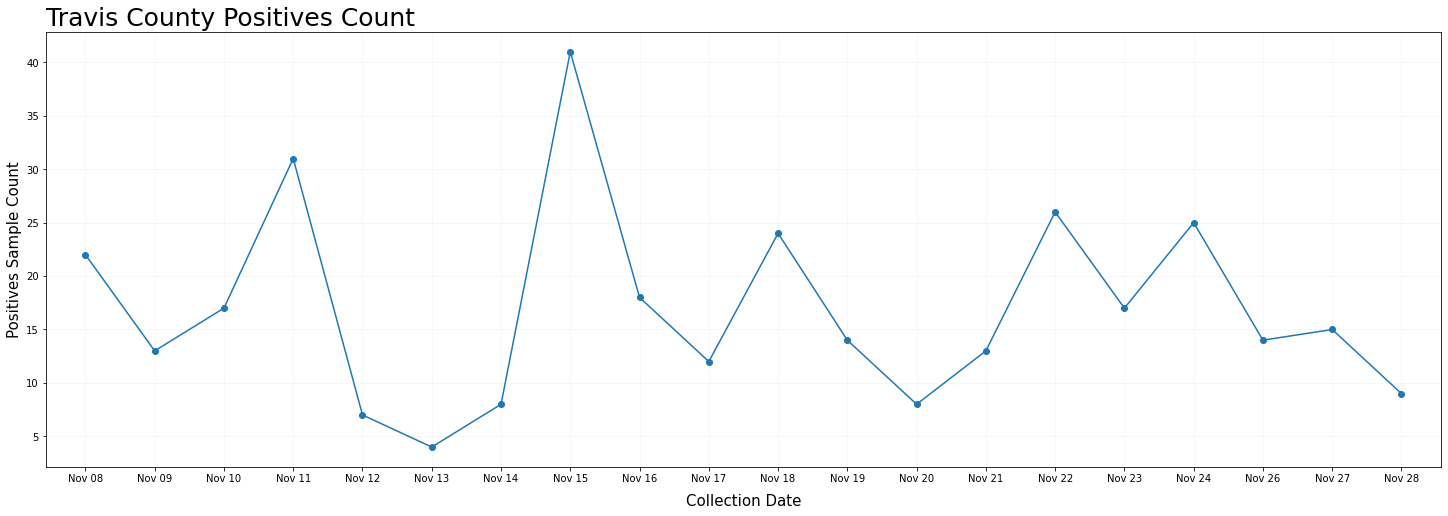

In [152]:
fig, ax1 = plt.subplots(figsize = (25, 8), facecolor = 'white')

plt.title(f'Travis County Positives Count', fontsize = 25, y = 1, loc = 'left')
ax1.set_xmargin(0.03)
ax1.set_xlabel('Collection Date', fontsize = 15, labelpad = 10)
ax1.set_ylabel('Positives Sample Count', fontsize = 15)
ax1.grid(visible = True, axis = 'both', color = 'whitesmoke')

ax1.plot(df3.Date_Display, df3.Positives_Count, marker = 'o')

plt.show()